In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge

In [4]:
# import training & test data
sm_df = pd.read_csv('csv/data_resampled_SMOTE.csv')
sme_df = pd.read_csv('csv/data_resampled_SMOTEENN.csv')
smt_df = pd.read_csv('csv/data_resampled_SMOTETomek.csv')
test_df = pd.read_csv('csv/test.csv')

X_train_sm, y_train_sm = sm_df[sm_df.columns[1:]], sm_df[sm_df.columns[0]]
X_train_sme, y_train_sme = sm_df[sme_df.columns[1:]], sm_df[sme_df.columns[0]]
X_train_smt, y_train_smt = sm_df[smt_df.columns[1:]], sm_df[smt_df.columns[0]]

X_test, y_test = test_df[test_df.columns[1:]], test_df[test_df.columns[0]]

## Random Forest Classifier

references:
1. https://www.datacamp.com/tutorial/random-forests-classifier-python
2. https://www.geeksforgeeks.org/how-to-solve-overfitting-in-random-forest-in-python-sklearn/

In [22]:
train_score = []
test_score = []

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()
rf1.fit(X_train_sm, y_train_sm)

# Predict Response corresponding to Predictors
y_train_sm_pred = rf1.predict(X_train_sm)
y_test_sm_pred = rf1.predict(X_test)

train1_score = rf1.score(X_train_sm, y_train_sm)
test1_score = rf1.score(X_test, y_test)

train_score.append(train1_score)
test_score.append(test1_score)

In [25]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_sme, y_train_sme)

# Predict Response corresponding to Predictors
y_train_sme_pred = rf2.predict(X_train_sme)
y_test_sme_pred = rf2.predict(X_test)

train2_score = rf2.score(X_train_sme, y_train_sme)
test2_score = rf2.score(X_test, y_test)

train_score.append(train2_score)
test_score.append(test2_score)

In [26]:
rf3 = RandomForestClassifier()
rf3.fit(X_train_smt, y_train_smt)

# Predict Response corresponding to Predictors
y_train_smt_pred = rf2.predict(X_train_smt)
y_test_smt_pred = rf2.predict(X_test)

train3_score = rf2.score(X_train_smt, y_train_smt)
test3_score = rf2.score(X_test, y_test)

train_score.append(train3_score)
test_score.append(test3_score)

		----------------------------------------------------------------------------------------------
Resampling	|SMOTE                         |SMOTEENN                      |SMOTETomek                    |
		----------------------------------------------------------------------------------------------
Train Accuracy:	|1.0                           |1.0                           |1.0                           |
Test Accuracy:	|0.9721666666666666            |0.9731666666666666            |0.9731666666666666            |


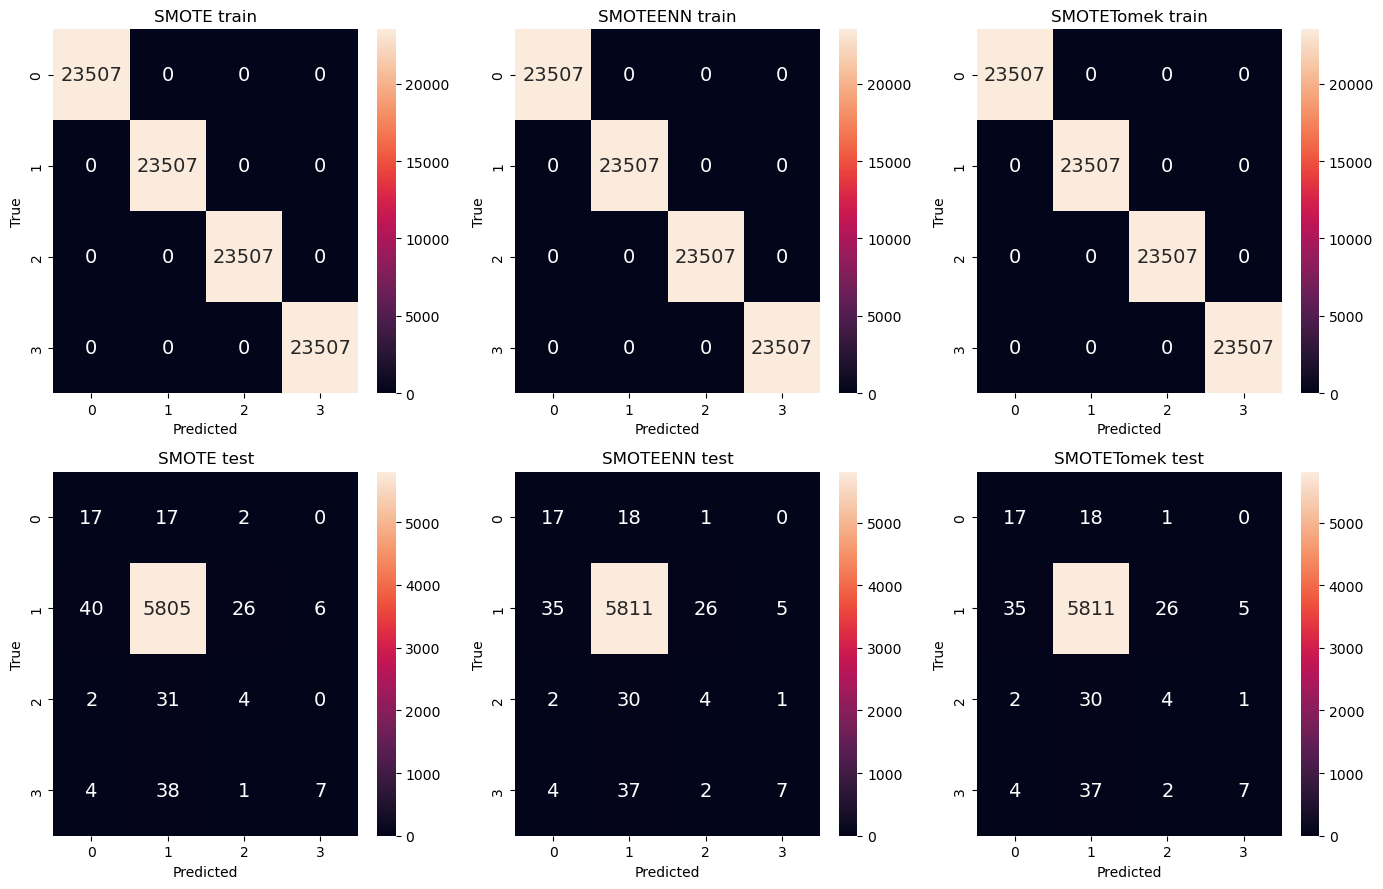

In [27]:
from sklearn.metrics import confusion_matrix

# print train and test score
col = ['SMOTE', 'SMOTEENN', 'SMOTETomek']

print('\t\t'+'-'*94)
print('Resampling\t|{:<30}|{:<30}|{:<30}|'.format(*col))
print('\t\t'+'-'*94)
print('Train Accuracy:\t|{:<30}|{:<30}|{:<30}|'.format(*train_score))
print('Test Accuracy:\t|{:<30}|{:<30}|{:<30}|'.format(*test_score))

# plot confusion matrix for train and test for all 3 resampling techniques
f, axes = plt.subplots(2, 3, figsize=(14, 9))

sb.heatmap(confusion_matrix(y_train_sm, y_train_sm_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0][0])
sb.heatmap(confusion_matrix(y_test, y_test_sm_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1][0])

sb.heatmap(confusion_matrix(y_train_sme, y_train_sme_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0][1])
sb.heatmap(confusion_matrix(y_test, y_test_sme_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1][1])

sb.heatmap(confusion_matrix(y_train_smt, y_train_smt_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0][2])
sb.heatmap(confusion_matrix(y_test, y_test_smt_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1][2])

labels = ['1', '2', '3', '4']
for i in range(2):
    for j in range(3):
        axes[i][j].xaxis_set_ticklabels=(labels)
        axes[i][j].yaxis_set_ticklabels=(labels)
        axes[i][j].set_xlabel('Predicted')
        axes[i][j].set_ylabel('True')
        if i == 0:
            axes[i][j].set_title(col[j]+' train')
        else:
            axes[i][j].set_title(col[j]+' test')

plt.tight_layout()

## Overfitting

We can clearly see that our result above is affected by overfitting. Our training accuracy has a perfect `train accuracy = 1.0` while our test accuracy has a very high accuracy of `test accuracy = 0.973`

In [15]:
train_score = []
test_score = []

In [17]:
from sklearn.ensemble import RandomForestClassifier

# add hyperparameter to prevent overfitting
rf1 = RandomForestClassifier(
    max_depth=8, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=10,
    random_state=20)

rf1.fit(X_train_sm, y_train_sm)

# Predict Response corresponding to Predictors
y_train_sm_pred = rf1.predict(X_train_sm)
y_test_sm_pred = rf1.predict(X_test)

train1_score = rf1.score(X_train_sm, y_train_sm)
test1_score = rf1.score(X_test, y_test)

train_score.append(train1_score)
test_score.append(test1_score)

In [18]:
train_score

[0.7734930020844855]

In [19]:
rf2 = RandomForestClassifier(
    max_depth=8, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=10,
    random_state=20)
rf2.fit(X_train_sme, y_train_sme)

# Predict Response corresponding to Predictors
y_train_sme_pred = rf2.predict(X_train_sme)
y_test_sme_pred = rf2.predict(X_test)

train2_score = rf2.score(X_train_sme, y_train_sme)
test2_score = rf2.score(X_test, y_test)

train_score.append(train2_score)
test_score.append(test2_score)

In [20]:
rf3 = RandomForestClassifier(
    max_depth=8, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=10,
    random_state=20)
rf3.fit(X_train_smt, y_train_smt)

# Predict Response corresponding to Predictors
y_train_smt_pred = rf2.predict(X_train_smt)
y_test_smt_pred = rf2.predict(X_test)

train3_score = rf2.score(X_train_smt, y_train_smt)
test3_score = rf2.score(X_test, y_test)

train_score.append(train3_score)
test_score.append(test3_score)

		----------------------------------------------------------------------------------------------
Resampling	|SMOTE                         |SMOTEENN                      |SMOTETomek                    |
		----------------------------------------------------------------------------------------------
Train Accuracy:	|0.7734930020844855            |0.7734930020844855            |0.7734930020844855            |
Test Accuracy:	|0.797                         |0.797                         |0.797                         |


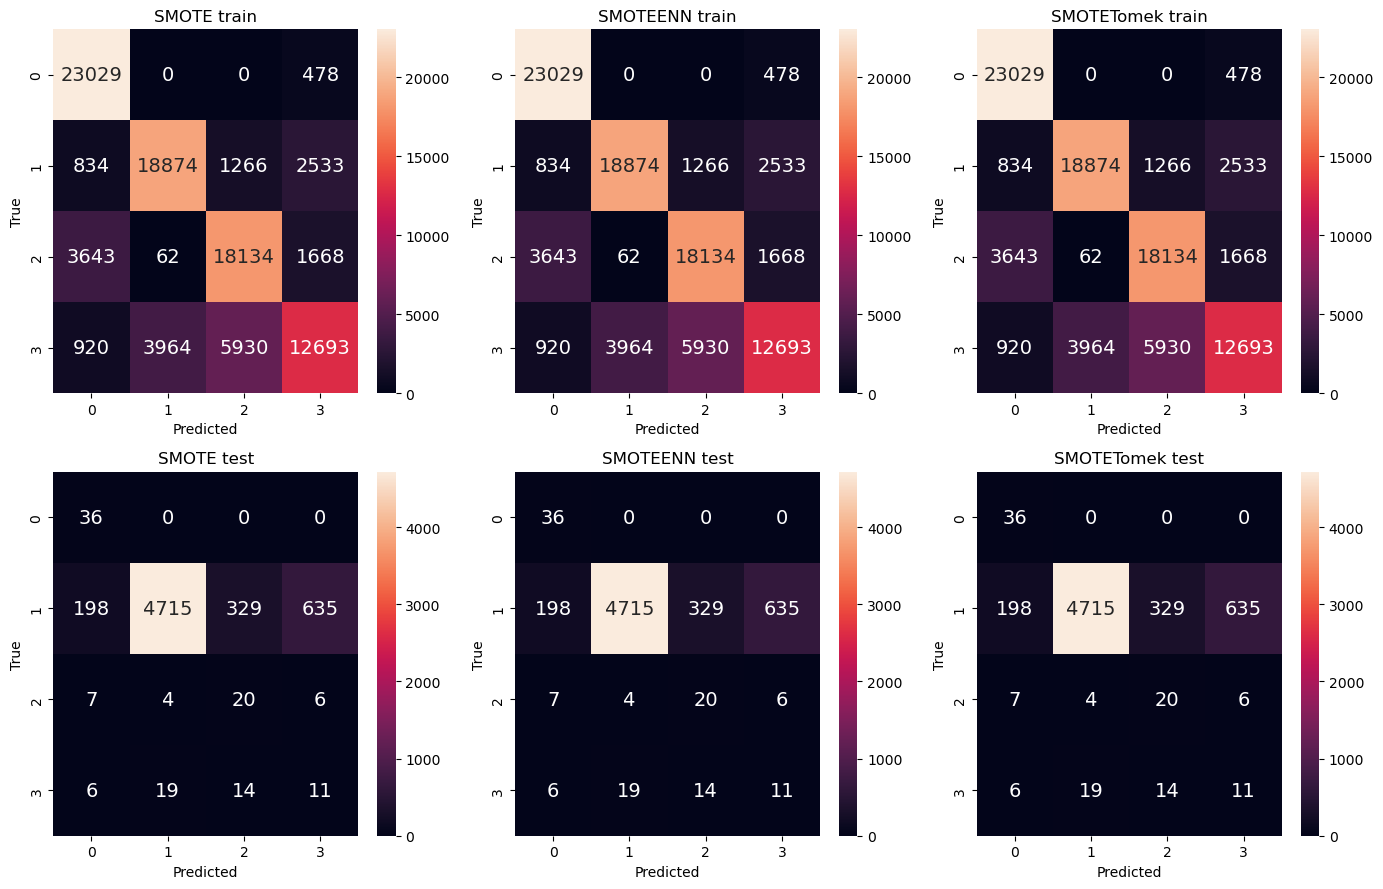

In [21]:
from sklearn.metrics import confusion_matrix

# print train and test score
col = ['SMOTE', 'SMOTEENN', 'SMOTETomek']

print('\t\t'+'-'*94)
print('Resampling\t|{:<30}|{:<30}|{:<30}|'.format(*col))
print('\t\t'+'-'*94)
print('Train Accuracy:\t|{:<30}|{:<30}|{:<30}|'.format(*train_score))
print('Test Accuracy:\t|{:<30}|{:<30}|{:<30}|'.format(*test_score))

# plot confusion matrix for train and test for all 3 resampling techniques
f, axes = plt.subplots(2, 3, figsize=(14, 9))

sb.heatmap(confusion_matrix(y_train_sm, y_train_sm_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0][0])
sb.heatmap(confusion_matrix(y_test, y_test_sm_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1][0])

sb.heatmap(confusion_matrix(y_train_sme, y_train_sme_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0][1])
sb.heatmap(confusion_matrix(y_test, y_test_sme_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1][1])

sb.heatmap(confusion_matrix(y_train_smt, y_train_smt_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0][2])
sb.heatmap(confusion_matrix(y_test, y_test_smt_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1][2])

labels = ['1', '2', '3', '4']
for i in range(2):
    for j in range(3):
        axes[i][j].xaxis_set_ticklabels=(labels)
        axes[i][j].yaxis_set_ticklabels=(labels)
        axes[i][j].set_xlabel('Predicted')
        axes[i][j].set_ylabel('True')
        if i == 0:
            axes[i][j].set_title(col[j]+' train')
        else:
            axes[i][j].set_title(col[j]+' test')

plt.tight_layout()

## Feature Importance

Having done our classification using Random Forest, we now want to see the feature importance to see which variable affects the severity the most

References:  
https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance

In [56]:
feature_scores1 = pd.Series(rf1.feature_importances_, index=X_train_sm.columns).sort_values(ascending=False)
feature_scores2 = pd.Series(rf2.feature_importances_, index=X_train_sm.columns).sort_values(ascending=False)
feature_scores3 = pd.Series(rf3.feature_importances_, index=X_train_sm.columns).sort_values(ascending=False)
feature_scores = pd.DataFrame([feature_scores1, feature_scores2, feature_scores3])
feature_scores = feature_scores.drop('Year', axis=1)

# feature_scores = feature_scores.transpose(copy=True)
feature_scores

,Distance,Month,Zipcode,Start_Lng,Season,Start_Lat,City,Pressure,Wind_Direction,County,...,Crossing,Is_Christmas,Stop,Station,Railway,Amenity,Traffic_Calming,No_Exit,Bump,Give_Way
0,0.134482,0.080049,0.076795,0.065477,0.064712,0.060751,0.034389,0.030368,0.029258,0.026563,...,0.000923,0.000831,0.000398,0.000128,0.000055,0.000043,0.000008,0.000006,0.000004,0.000002
1,0.138426,0.071703,0.063325,0.066269,0.057368,0.069966,0.034084,0.031467,0.030342,0.026794,...,0.001239,0.000644,0.000494,0.000116,0.000044,0.000044,0.000008,0.000003,0.000008,0.000005
2,0.132767,0.071219,0.066654,0.068395,0.060625,0.068051,0.036019,0.031906,0.029648,0.026198,...,0.000994,0.000839,0.000372,0.000112,0.000037,0.000045,0.000006,0.000003,0.000006,0.000003


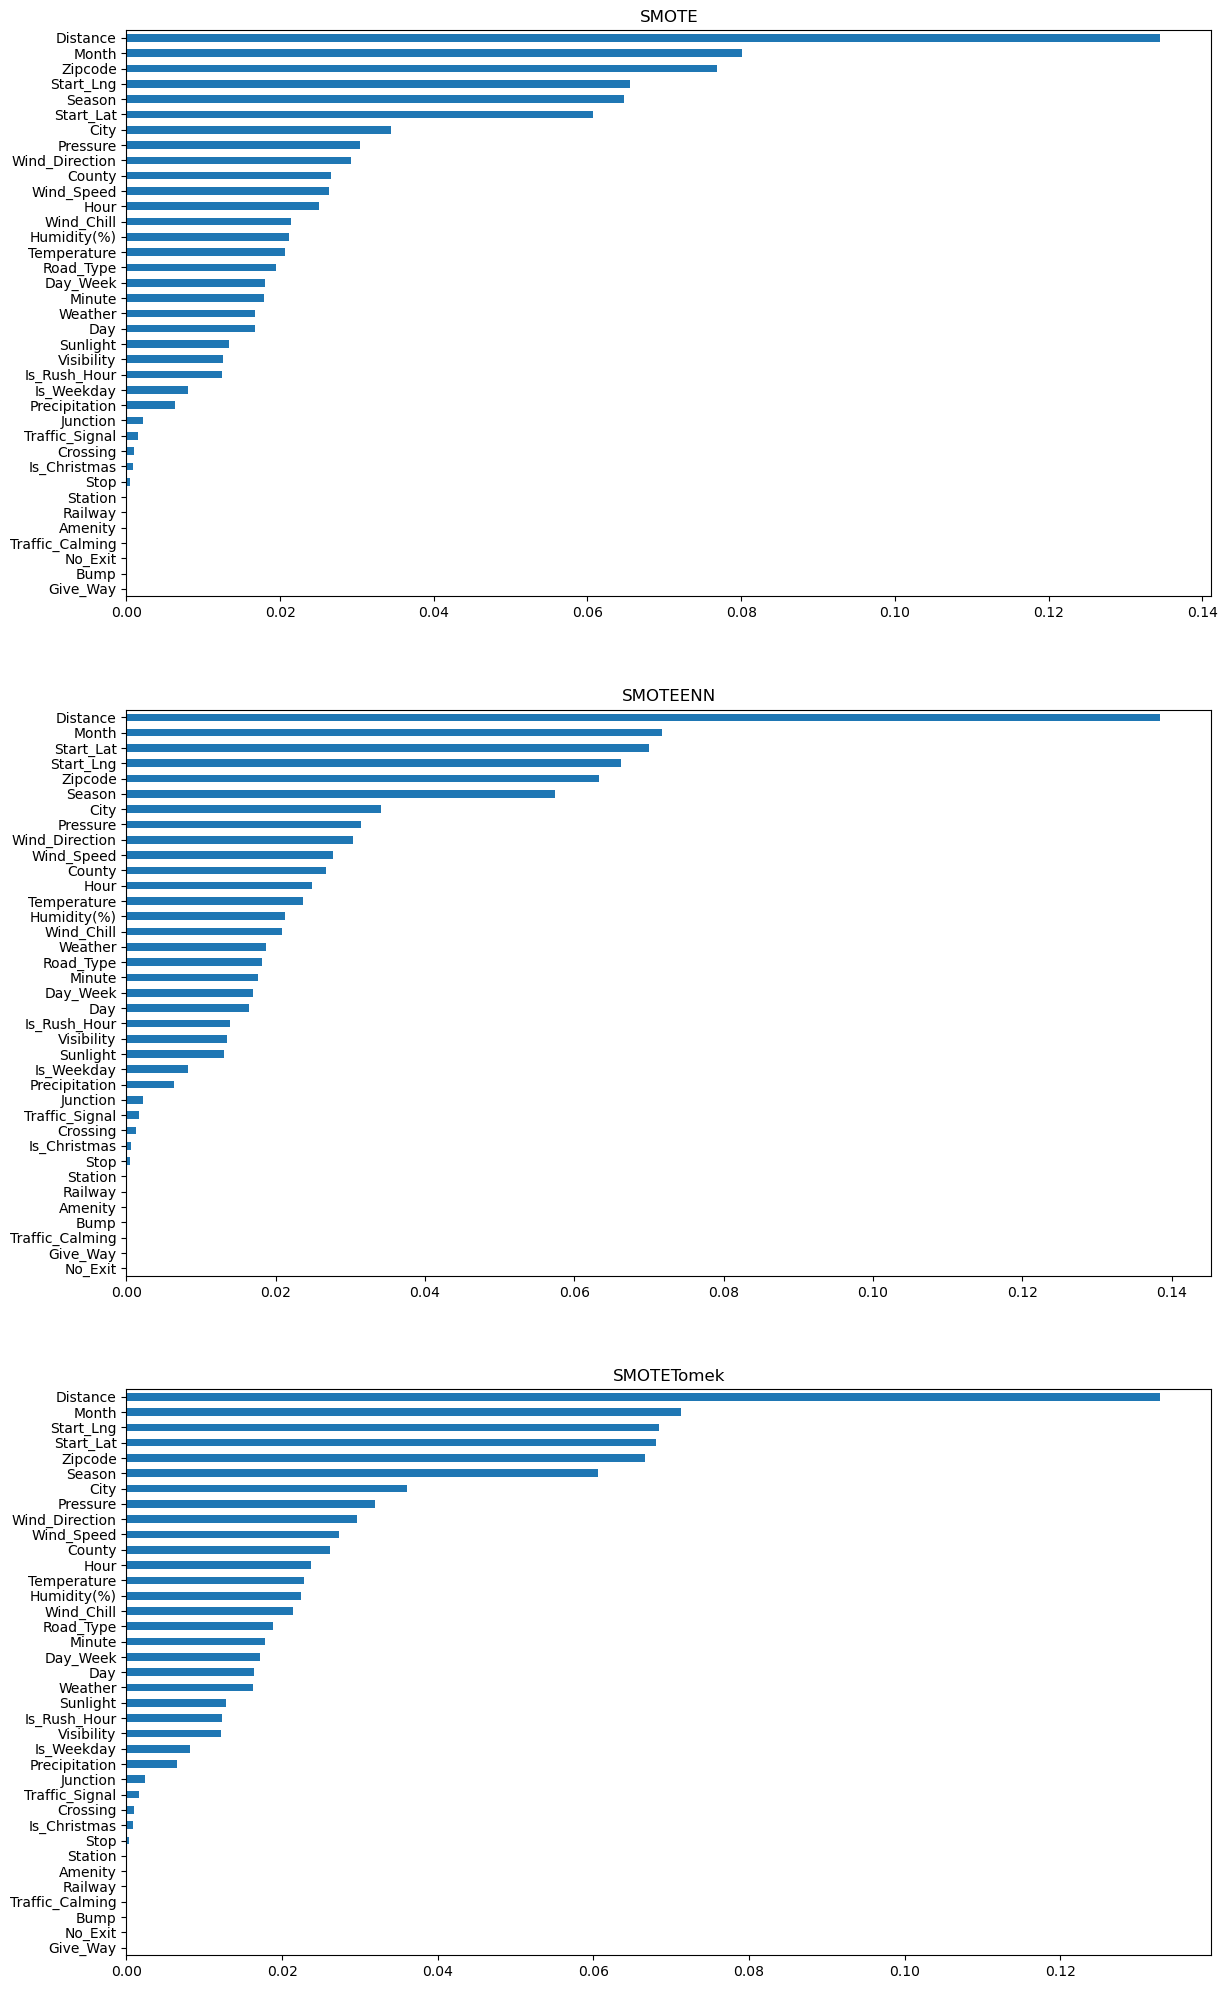

In [63]:
f, axes = plt.subplots(3, 1, figsize=(14, 25))

title = ['SMOTE', 'SMOTEENN', 'SMOTETomek']
for index, row in feature_scores.iterrows():
    row.sort_values().plot(kind='barh', ax=axes[index], title=title[index])

From above, we can see that all 3 resampling techniques have similar outcome for the feature importance. `Distance` is the most imporant feature for the `Severity` of the accident, followed by `Month`. The location of the accident, `Start_Lng`, `Start_Lat` and `Zipcode` also is an important feature being in the top 5 features